**PROBLEM STATEMENT**

A company delivers subsidies to individuals based on their income. Accurate income data is one of the hardest piece of data to obtain across the world. The company has obtained a large set of authenticated data on individual income, demographic parameters, and few financial parameters.
Develop an income classifier system for individuals.

**OBJECTIVE**

Simplfy the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help the company in planning susbidy outlay, monitoring and preventing misuse.

**INTRODUCTION TO CLASSIFICATION CASE STUDY**

* Data file name    : income
* Data file type    : csv
* Data set          : (31978 x 13) Numerical-4,Categorical-9
* Method used       : Classification technique (Supervised, Binary classification model)
* Problem statement : Develop an classifier for individuals with reduced number of variables to find the income bracket

**FRAME WORK**

Data -> Supervised calssification model -> Model developed on train data -> Variable importance (algorithm) -> Validate model on test data -> Model with reduced variable

**MODEL IDENTIFICATION**
* Logistic Regression
* Random Forest
* K Nearest Neighbors 

**REALIZATION OF SOLUTION**
* Evaluate performance matrics
* If assumptions are satisfied and solutions are acceptable, then the model is good

**IMPORTING THE REQUIRED PYTHON LIBRARIES**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

**IMPORTING DATA**

In [2]:
os.chdir("D:\VG\DATA SCIENCE\Data sets\Income")
data_income=pd.read_table("income.csv",sep=",")

In [3]:
# Creating a copy of the original data
data=data_income.copy()

**EXPLORATORY DATA ANALYSIS**

In [4]:
# Getting to know the data 
data.head(3)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"


In [5]:
# Checking for missing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [6]:
# To check the variables data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
# Summary of numerical variables
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [8]:
# Summary of categorical variables
data.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [9]:
# Frequency of each variable
data["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [10]:
# Checking for unique classes 
print(np.unique(data["JobType"]))
print(np.unique(data["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [11]:
# Specifying null values while importing
data=pd.read_table('income.csv',sep=",",na_values=[" ?"])

In [12]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [13]:
# Data Pre-processing
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [14]:
# Considering at least one column value is missing
missing=data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

**Missing data :**
* Missing values in Jobtype = 1809 
* Missing values in Occupation = 1816
* 1809 rows have both Jobtype and Occupation missing.
* 7 rows have Jobtype as Never worked, and Occupation to be missing.
* Since, it is a complicated scenerio to fill the missing data, we are removing them.

In [15]:
# Removing rows with missing values
data2=data.dropna(axis=0)

In [16]:
# Relationship between independent variables
data2.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


Non of the variables are correlated with each other.

In [17]:
# Cross tables and Data Visualization
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [18]:
# Gender proportion table
gender=pd.crosstab(index=data2["gender"],columns="count",normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [19]:
# Gender vs Salary Status two way table
gender_salstat=pd.crosstab(index=data2["gender"],columns=data2["SalStat"],margins=True,normalize="index")
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

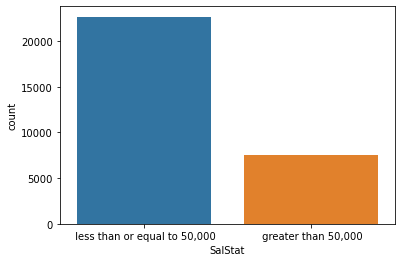

In [20]:
# Frequency distribution of Salary Status
sns.countplot(data2["SalStat"])

<AxesSubplot:xlabel='JobType', ylabel='age'>

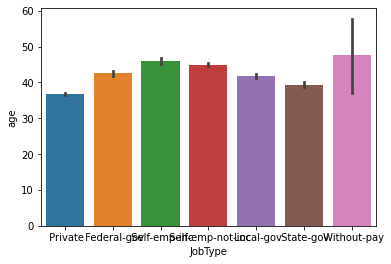

In [21]:
# Barplot for Jobtype vs Age
sns.barplot(x=data2["JobType"],y=data2["age"])

<AxesSubplot:xlabel='JobType', ylabel='age'>

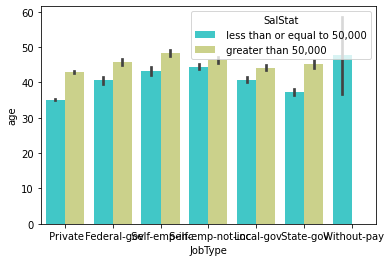

In [22]:
# Barplot for Jobtype vs Age with hue Salary Status
sns.barplot(x='JobType',y='age',data=data2, palette='rainbow',hue='SalStat')

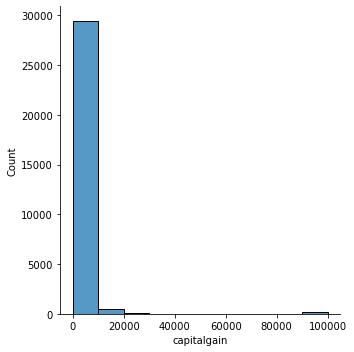

In [23]:
# Histogram of Capital gain
sns.displot(data2["capitalgain"],bins=10,kde=False)

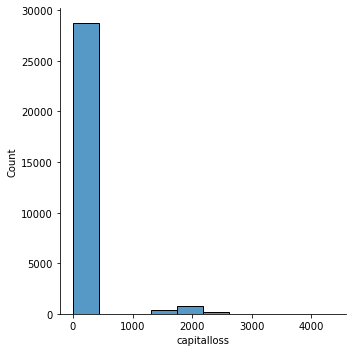

In [24]:
# Histogram of Capital loss
sns.displot(data2["capitalloss"],bins=10,kde=False)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

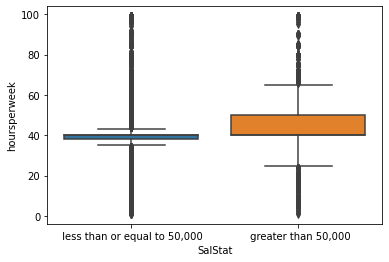

In [25]:
# Box Plot for Hours per week vs Salary status
sns.boxplot("SalStat","hoursperweek",data=data2)


**Insights from the Exploratory Data Analysis :**
* People with age 20-45 age are high in frequency
* People with 35-50 age are more likely to earn > 50000 USD per year
* People with 25-35 age are more likely to earn <= 50000 USD per year
* 56% of self employed people earn more than 50000 USD per year
* People with Doctorate,Masters,Prof-school are more likely to earn more than 50000 USD per year
* Managers and professionals are more likely to earn 50000 USD per year
* 92% of the capital gain is 0
* 95% of the capital loss is 0
* People who earn more than 50000 USD per year are more likely to spend 40-50 hours per week

In [26]:
data3=data2.copy()

**LOGISTIC REGRESSION**

In [27]:
# Reindexing the Salary status names to 0,1 since Machine Learning models cannot work with catergorical values
data2["SalStat"]=data2["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})
print(data2["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-27-55e11a6d1926>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["SalStat"]=data2["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})


In [28]:
# Convert catergorical variables to dummies
new_data=pd.get_dummies(data2,drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Local-gov  JobType_ Private  JobType_ Self-emp-inc  \
0                       0                 1                      0   
1                       0                 0                      0   
2                       0        

In [29]:
# Storing the column names
column_list=list(new_data.columns)
print(column_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [30]:
# Seperating the input names from data
features=list(set(column_list)-set(["SalStat"]))
print(features)

['nativecountry_ Outlying-US(Guam-USVI-etc)', 'hoursperweek', 'nativecountry_ Dominican-Republic', 'EdType_ 1st-4th', 'EdType_ Some-college', 'occupation_ Sales', 'occupation_ Other-service', 'maritalstatus_ Married-civ-spouse', 'occupation_ Prof-specialty', 'occupation_ Handlers-cleaners', 'race_ Asian-Pac-Islander', 'EdType_ Bachelors', 'nativecountry_ Germany', 'nativecountry_ Cuba', 'nativecountry_ Hungary', 'nativecountry_ England', 'nativecountry_ Haiti', 'nativecountry_ France', 'nativecountry_ Puerto-Rico', 'nativecountry_ Poland', 'occupation_ Armed-Forces', 'nativecountry_ India', 'nativecountry_ Greece', 'maritalstatus_ Married-spouse-absent', 'JobType_ Self-emp-not-inc', 'nativecountry_ South', 'JobType_ Private', 'EdType_ Assoc-voc', 'occupation_ Protective-serv', 'occupation_ Exec-managerial', 'JobType_ Without-pay', 'EdType_ 5th-6th', 'EdType_ Assoc-acdm', 'nativecountry_ Jamaica', 'nativecountry_ United-States', 'nativecountry_ Thailand', 'nativecountry_ Laos', 'nativec

In [31]:
# Storing the output in y (dependent variable)
y=new_data["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [32]:
# Storing the values from input features (independent variable)
x=new_data[features].values
print(x)

[[ 0 28  0 ...  0  1  0]
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 ...
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  1  0]]


In [33]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)
print(train_x)

[[ 0 40  0 ...  1  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0 30  1 ...  0  0  0]
 ...
 [ 0 50  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0 50  0 ...  0  1  0]]


In [34]:
# Make an instance of the Model
logistic= LogisticRegression()

In [35]:
# Fitting the values for x and y
print(logistic.fit(train_x,train_y))
print(logistic.coef_)
print(logistic.intercept_)

LogisticRegression()
[[-7.40036871e-03  9.03842879e-03 -2.56532664e-02 -7.15053430e-02
  -3.95741270e-01  9.75595485e-02 -7.40094498e-01  1.13494953e+00
   6.82535007e-01 -3.38778384e-01 -1.17552954e-01  7.21388818e-01
   1.45250895e-02 -8.17160641e-03 -3.26600478e-03  1.26822456e-02
  -1.18067060e-02  5.70051645e-03 -4.12815207e-02 -9.32651015e-03
  -1.93605457e-03 -2.02030016e-02 -8.30629060e-03 -5.83344922e-02
  -5.81197429e-01 -2.64748547e-02 -3.28185579e-01 -3.84869722e-02
  -1.41312229e-02  8.96333506e-01 -8.11207298e-03 -1.40000007e-01
  -5.95483383e-02 -1.19700557e-02 -4.25992941e-01 -3.32713018e-03
  -6.13310345e-03 -1.25429518e-03 -2.63112647e-02 -1.79272071e-01
  -2.44243620e-01  1.65322316e-01 -8.91127264e-04  1.61641416e-01
   2.48019292e-01 -5.14840971e-04 -9.34910515e-01 -3.25917112e-01
   5.25832023e-01 -1.20607186e-02  1.96820155e-03 -9.41329951e-01
  -1.37000187e-02 -1.94929168e-01  3.59715689e-03  2.33557961e-01
  -4.33490481e-01 -4.05997767e-02 -2.01605761e-02 -7.22

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Prediction from test data
prediction1=logistic.predict(test_x)
print(prediction1)

[0 0 0 ... 0 0 0]


**EVALUATION OF MODEL**

In [37]:
# Confusion matrix
cm=confusion_matrix(test_y,prediction1)
print(cm)

[[6291  532]
 [ 946 1280]]


In [38]:
# Calculating the accuracy
as1=accuracy_score(test_y,prediction1)
print(as1)

0.8366670350314952


In [39]:
# Printing the misclassified values from prediction
print("Misclassified samples: %d" %(test_y != prediction1).sum())

Misclassified samples: 1478


**Result:**
* The Accuracy score of the above model is 0.83666
* There are 1478 misclassified samples.

**LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES**

In [40]:
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [41]:
# Reindexing the Salary status names to 0,1
data3["SalStat"]=data3["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})
print(data3["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [42]:
# Removing all insignificant variables
cols=["gender","nativecountry","race","JobType"]
new_data2=data3.drop(cols,axis=1)
print(new_data2)

       age         EdType        maritalstatus        occupation  \
0       45        HS-grad             Divorced      Adm-clerical   
1       24        HS-grad        Never-married      Armed-Forces   
2       44   Some-college   Married-civ-spouse    Prof-specialty   
3       27            9th        Never-married      Craft-repair   
4       20   Some-college        Never-married             Sales   
...    ...            ...                  ...               ...   
31973   34        HS-grad        Never-married   Farming-fishing   
31974   34   Some-college        Never-married   Protective-serv   
31975   23   Some-college   Married-civ-spouse      Adm-clerical   
31976   42   Some-college   Married-civ-spouse      Adm-clerical   
31977   29      Bachelors        Never-married    Prof-specialty   

          relationship  capitalgain  capitalloss  hoursperweek  SalStat  
0        Not-in-family            0            0            28        0  
1            Own-child            0

In [43]:
# Convert catergorical variables to dummies
new_data2=pd.get_dummies(data3,drop_first=True)
print(new_data2)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Local-gov  JobType_ Private  JobType_ Self-emp-inc  \
0                       0                 1                      0   
1                       0                 0                      0   
2                       0        

In [44]:
# Storing the column names
column_list2=list(new_data2.columns)
print(column_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [45]:
# Seperating the input names from data
features2=list(set(column_list2)-set(["SalStat"]))
print(features2)

['nativecountry_ Outlying-US(Guam-USVI-etc)', 'hoursperweek', 'nativecountry_ Dominican-Republic', 'EdType_ 1st-4th', 'EdType_ Some-college', 'occupation_ Sales', 'occupation_ Other-service', 'maritalstatus_ Married-civ-spouse', 'occupation_ Prof-specialty', 'occupation_ Handlers-cleaners', 'race_ Asian-Pac-Islander', 'EdType_ Bachelors', 'nativecountry_ Germany', 'nativecountry_ Cuba', 'nativecountry_ Hungary', 'nativecountry_ England', 'nativecountry_ Haiti', 'nativecountry_ France', 'nativecountry_ Puerto-Rico', 'nativecountry_ Poland', 'occupation_ Armed-Forces', 'nativecountry_ India', 'nativecountry_ Greece', 'maritalstatus_ Married-spouse-absent', 'JobType_ Self-emp-not-inc', 'nativecountry_ South', 'JobType_ Private', 'EdType_ Assoc-voc', 'occupation_ Protective-serv', 'occupation_ Exec-managerial', 'JobType_ Without-pay', 'EdType_ 5th-6th', 'EdType_ Assoc-acdm', 'nativecountry_ Jamaica', 'nativecountry_ United-States', 'nativecountry_ Thailand', 'nativecountry_ Laos', 'nativec

In [46]:
# Storing the output in y (dependent variable)
y=new_data2["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [47]:
# Storing the values from input features (independent variable)
x=new_data2[features].values
print(x)

[[ 0 28  0 ...  0  1  0]
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 ...
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0 40  0 ...  0  1  0]]


In [48]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)
print(train_x)

[[ 0 40  0 ...  1  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0 30  1 ...  0  0  0]
 ...
 [ 0 50  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0 50  0 ...  0  1  0]]


In [49]:
# Make an instance of the Model
logistic= LogisticRegression()

In [50]:
# Fitting the values for x and y
print(logistic.fit(train_x,train_y))
print(logistic.coef_)
print(logistic.intercept_)

LogisticRegression()
[[-7.40036871e-03  9.03842879e-03 -2.56532664e-02 -7.15053430e-02
  -3.95741270e-01  9.75595485e-02 -7.40094498e-01  1.13494953e+00
   6.82535007e-01 -3.38778384e-01 -1.17552954e-01  7.21388818e-01
   1.45250895e-02 -8.17160641e-03 -3.26600478e-03  1.26822456e-02
  -1.18067060e-02  5.70051645e-03 -4.12815207e-02 -9.32651015e-03
  -1.93605457e-03 -2.02030016e-02 -8.30629060e-03 -5.83344922e-02
  -5.81197429e-01 -2.64748547e-02 -3.28185579e-01 -3.84869722e-02
  -1.41312229e-02  8.96333506e-01 -8.11207298e-03 -1.40000007e-01
  -5.95483383e-02 -1.19700557e-02 -4.25992941e-01 -3.32713018e-03
  -6.13310345e-03 -1.25429518e-03 -2.63112647e-02 -1.79272071e-01
  -2.44243620e-01  1.65322316e-01 -8.91127264e-04  1.61641416e-01
   2.48019292e-01 -5.14840971e-04 -9.34910515e-01 -3.25917112e-01
   5.25832023e-01 -1.20607186e-02  1.96820155e-03 -9.41329951e-01
  -1.37000187e-02 -1.94929168e-01  3.59715689e-03  2.33557961e-01
  -4.33490481e-01 -4.05997767e-02 -2.01605761e-02 -7.22

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Prediction from test data
prediction2=logistic.predict(test_x)
print(prediction2)

[0 0 0 ... 0 0 0]


**EVALUATION OF MODEL AFTER REMOVING INSIGNIFICANT VARIABLES**

In [52]:
# Confusion matrix
cm2=confusion_matrix(test_y,prediction2)
print(cm2)

[[6291  532]
 [ 946 1280]]


In [53]:
# Calculating the accuracy
as2=accuracy_score(test_y,prediction2)
print(as2)

0.8366670350314952


In [54]:
# Printing the misclassified values from prediction
print("Misclassified samples: %d" %(test_y != prediction2).sum())

Misclassified samples: 1478


**Result:**
* The Accuracy score of the above model is 0.83666
* There are 1478 misclassified samples

**KNN CLASSIFIER MODEL**

In [55]:
# Importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

In [56]:
# Starting the K nearest neighbours classifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [57]:
# Fitting the values for x and y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [58]:
# Predicting the test values with model
prediction3=KNN_classifier.predict(test_x)
print(prediction3)

[0 0 0 ... 1 0 0]


**EVALUATION OF KNN CLASSIFIER MODEL**

In [59]:
# Confusion matrix
cm3=confusion_matrix(test_y,prediction3)
print(cm3)

[[6173  650]
 [ 843 1383]]


In [60]:
# Calculating the accuracy
as3=accuracy_score(test_y,prediction3)
print(as3)

0.8350093933031274


In [61]:
# Printing the misclassified values from prediction
print("Misclassified samples: %d" %(test_y != prediction3).sum())

Misclassified samples: 1493


**Result:**
* The Accuracy score of the above model is 0.83500
* There are 1493 misclassified samples

**EFFECT OF K VALUE ON CLASSIFIER**

In [62]:
# Calculating error for K values between 1 and 20
Misclassified_sample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print(Misclassified_sample)

[1766, 1516, 1515, 1436, 1493, 1438, 1451, 1432, 1458, 1436, 1441, 1447, 1451, 1423, 1413, 1390, 1424, 1396, 1434]


**Logistic Regression VS KNN:**

Logistic Regression model is performing better when compared to KNN model, with a difference of 0.00165 in Accuracy Score.